# Reddit Podatki

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import numpy as np

import glob

import os

### Naloži podatke

In [45]:
# all methods for parsing

def parse_subbreddit(path):
    days = []
    folders = [path + "/" + folder + "/" for folder in sorted(os.listdir(path))]
    for folder in folders:
        file_paths = sorted(glob.glob(folder + "*.txt"))
        files = [open(file_path) for file_path in file_paths]
        submissions_of_day = parse_submissions_of_day(files)
        days.append(submissions_of_day)
    return days
    

def parse_submissions_of_day(files):
    submissions_of_day = []
    for file in files:
        submissions_of_day.append(parse_submission_file(file))
    return submissions_of_day

def parse_submission_file(file):
    comments = []
    for line_num, line in enumerate(file):
        if line_num == 0:
            file_creationTime = int(line[17:])
            continue
        if line_num == 1:
            subreddit = line[11:]
            continue
        if line_num == 2:
            submission_title = line[18:]
            continue
        if line_num == 3:
            submission_creationTime = int(line[24:])
            continue
        if line_num == 4:
            submission_score = int(line[18:])
            continue
        if line_num == 5:
            continue
        if line_num == 6:
            continue
        comments.append(pase_comment_line(line))
    return (file_creationTime, 
            subreddit, 
            submission_title, 
            submission_creationTime,
            submission_score,
            comments)
        
def pase_comment_line(line):
    line_split = line.split("\t")
    level = int(line_split[0])
    creationTime = int(line_split[1])
    score = int(line_split[2])
    content = line_split[3]
    
    return (level,
            creationTime,
            score,
            content)

In [46]:
# parsing of subreddits

bitcoin_subreddit_path = "./../data/reddit/Bitcoin/"
bitcoinMarkets_subreddit_path = "./../data/reddit/Bitcoin/"
btc_subreddit_path = "./../data/reddit/Bitcoin/"
btcNews_subreddit_path = "./../data/reddit/Bitcoin/"
cryptocurrency_subreddit_path = "./../data/reddit/Bitcoin/"


bitcoin_days = parse_subbreddit(bitcoin_subreddit_path)
bitcoinMarkets_days = parse_subbreddit(bitcoinMarkets_subreddit_path)
btc_days = parse_subbreddit(btc_subreddit_path)
btcNews_days = parse_subbreddit(btcNews_subreddit_path)
cryptocurrency = parse_subbreddit(cryptocurrency_subreddit_path)

In [44]:
# parsing of dayly discussions

def get_dd_dates(file_names):
    r = []
    for file_name in file_names:
        split = file_name.split("/")
        date = split[-1].replace(".txt", "")
        r.append(date)
    return r

def get_submissions(file_names):
    r = []
    for file_name in file_names:
        file = open(file_name)
        r.append(parse_submission_file(file))
    return r

dd_dates = []

bitcoinDD_submissions = []
cryptocurrencyDD_submissions = []

# loads data for bitcoinDD

bitcoinDD_filenames = sorted(glob.glob("../data/reddit/daily_discussion_bitcoin/*.txt"))
cryptocurrency_DD_filenames = sorted(glob.glob("../data/reddit/daily_discussion_cryptocurrency/*.txt"))

dd_dates = get_dd_dates(bitcoinDD_filenames)

bitcoinDD_submissions = get_submissions(bitcoinDD_filenames)
cryptocurrencyDD_submissions = get_submissions(cryptocurrency_DD_filenames)

In [48]:
# numOf Top Level comments
bitcoinDD_numOfLevel0Comments = []
cryptocurrencyDD_numOfLevel0Comments = []

def get_dd_numOfLevel0Comments(submissions):
    r = []
    for submission in submissions:
        numOfLevel0Comments = 0
        comments = submission[5]
        for comment in comments:
            if comment[0] == 0:
                numOfLevel0Comments += 1
        r.append(numOfLevel0Comments)
    return r

bitcoinDD_numOfLevel0Comments = get_dd_numOfLevel0Comments(bitcoinDD_submissions)
cryptocurrencyDD_numOfLevel0Comments = get_dd_numOfLevel0Comments(cryptocurrencyDD_submissions)

### Osnovna statistika

In [63]:
bitcoinDD_meanScores = []
cryptocurrencyDD_meanScores = []

def calculate_meanScores(submissions):
    r = []
    for submission in submissions:
        comments = submission[5]
        scores = [comment[2] for comment in comments]
        r.append(np.mean(scores))
    return r


bitcoinDD_meanScores = calculate_meanScores(bitcoinDD_submissions)
cryptocurrencyDD_meanScores = calculate_meanScores(cryptocurrencyDD_submissions)

print("Povprečen score komentarjev")
print()
print("Bitcoin Daily Discussion:")
for i in range(len(bitcoinDD_meanScores)):
    print(dd_dates[i], "->",bitcoinDD_meanScores[i])
print()
print("CryptoCurrency Daily Discussion:")
for i in range(len(cryptocurrencyDD_meanScores)):
    print(dd_dates[i], "->",cryptocurrencyDD_meanScores[i])

Povprečen score komentarjev

Bitcoin Daily Discussion:
2018-04-02 -> 1.36994219653
2018-04-03 -> 1.33742331288
2018-04-04 -> 1.65032679739
2018-04-05 -> 1.52674897119
2018-04-06 -> 1.60769230769
2018-04-07 -> 1.09047619048
2018-04-08 -> 1.40186915888
2018-04-09 -> 1.48210023866

CryptoCurrency Daily Discussion:
2018-04-02 -> 5.68308351178
2018-04-03 -> 5.68875502008
2018-04-04 -> 4.74442190669
2018-04-05 -> 5.11064718163
2018-04-06 -> 5.1623246493
2018-04-07 -> 3.31578947368
2018-04-08 -> 3.21854304636
2018-04-09 -> 4.98736842105


### Visualisation

#### Število Level_0 komentarjev

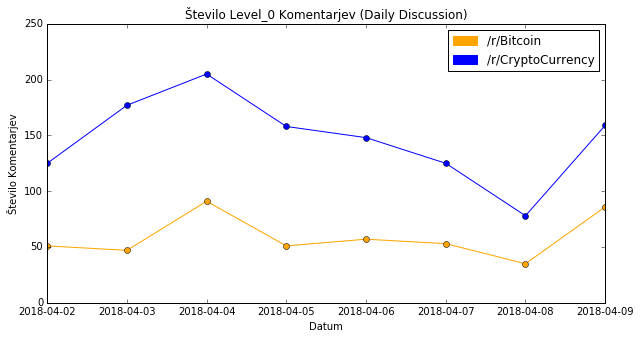

In [49]:
fig, ax = plt.subplots()

x_es = list(range(len(dd_dates)))
x_ticks = [date for date in dd_dates]

fig.set_size_inches(10,5)

# bitcoin
bitcoin_color = "orange"
plt.plot(x_es, bitcoinDD_numOfLevel0Comments,
         linestyle='-',marker="o",
         color=bitcoin_color)
bitcoin_patch = mpatches.Patch(color=bitcoin_color, label='/r/Bitcoin')

# cryptoCurrency
cryptocurrency_color = "blue"
plt.plot(x_es, cryptocurrencyDD_numOfLevel0Comments,
         linestyle='-',marker="o",
        color=cryptocurrency_color)
cryptocurrency_patch = mpatches.Patch(color=cryptocurrency_color, label='/r/CryptoCurrency')

plt.title("Število Level_0 Komentarjev (Daily Discussion)")

plt.legend(handles=[bitcoin_patch, cryptocurrency_patch])

plt.ylabel("Število Komentarjev")
plt.xlabel("Datum")

plt.xticks(x_es, x_ticks)

plt.show()
plt.draw()

In [40]:
# Shrani
fig.savefig('../assets/daily_discussion_st_komentarjev.png')